In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [27]:
def compute_r(R0, N=1000):
    """Theoretical final size."""
    upper_r = 1
    lower_r = 0
    for T in range(100000):
        r = (upper_r + lower_r)/2
        r_ = (1 - np.exp(-R0 * r))
        if r_ < r:
            upper_r = r
        else:
            lower_r = r
    return r*N

In [52]:
def get_moment(I, m, buckets):
    moment = 0.0
    for b in range(buckets):
        p = (1.0 / buckets) * (b + 0.5)
        moment += (p**m) * I[b]
    return moment
    

In [179]:
dt = 0.01

# parameters
def simulate(
    dt = dt,
    start = 1.0,
    buckets = 100,
    beta_params = (1, 1),
    N = 1000,
    gamma = 1,
    alpha_r = 0.008,
    alpha_c = 0.002):
    """ 
    Simulates an epidemic using integro-differential equations
    returns final pandemic size
    """
    X = np.linspace(0.001, 0.999, buckets)
    
    Ss, Is, Rs = [], [], []
    Ps, Vs, Rts = [], [], []

    # multiplies by the beta distribution to initialize
    # if this is confusing later, could loop through instead
    S = np.zeros(buckets) + (N/buckets)*(1 - start/N)*stats.beta.pdf(X, beta_params[0], beta_params[1])
    I = np.zeros(buckets) + (N/buckets)*(start/N)*stats.beta.pdf(X, beta_params[0], beta_params[1])
    R = np.zeros(buckets)
    
    while sum(I) > start/2:
        # compute both changes up front, then use them to iterate

        recoveries = I * gamma * dt

        # this one requires iterating over the values of p
        new_infections = np.zeros(buckets)

        zero_moment_I = sum(I)
        first_moment_I = get_moment(I, 1, buckets)
#         for b in range(buckets):
#             p = (1.0 / buckets) * (b + 0.5)
#             zero_moment_I += I[b]
#             first_moment_I += p * I[b]

        for b in range(buckets):
            # p is for the middle of the bucket:
            p = (1.0 / buckets) * (b + 0.5)
            new_infections[b] = S[b] * zero_moment_I * alpha_c + p * S[b] * first_moment_I * alpha_r

        S -= dt * new_infections
        I += dt * new_infections
        I -= recoveries
        R += recoveries
        Ss.append(sum(S))
        Is.append(sum(I))
        Rs.append(sum(R))
        P = get_moment(I, 1, buckets)/get_moment(I, 0, buckets)
        V = get_moment(S, 1, buckets)/get_moment(S, 0, buckets)
        Rt = (sum(S)/gamma) * (alpha_c + alpha_r * P * V)
        Ps.append(P)
        Vs.append(V)
        Rts.append(Rt)
        

    return Ss, Is, Rs, Ps, Vs, Rts, S, I, R

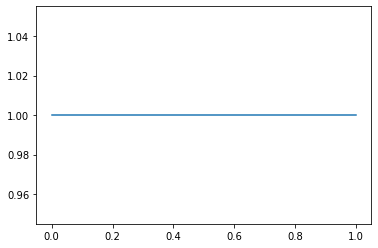

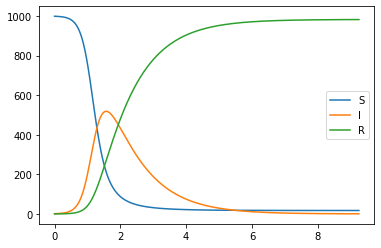

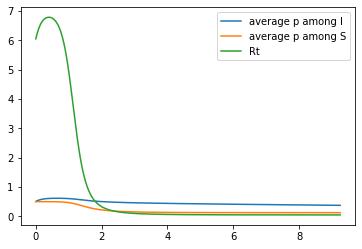

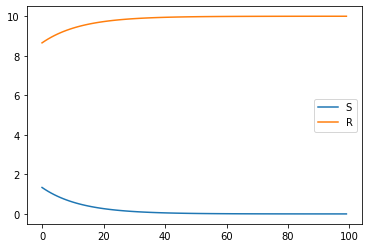

In [195]:
a, b = 1, 1
alpha_c = 0.002
alpha_r = 0.016
Ss, Is, Rs, Ps, Vs, Rts, S, I, R = simulate(beta_params=(a, b), alpha_c=alpha_c, alpha_r=alpha_r)

x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, a, b))
plt.show()

T = np.arange(0, len(Ss)*dt, dt)
plt.plot(T, Ss, label="S")
plt.plot(T, Is, label="I")
plt.plot(T, Rs, label="R")
plt.legend()
plt.show()



plt.plot(T, Ps, label="average p among I")
plt.plot(T, Vs, label="average p among S")
plt.plot(T, Rts, label="Rt")

plt.legend()
plt.show()

plt.plot(S, label='S')
plt.plot(R, label='R')
plt.legend()
plt.show()

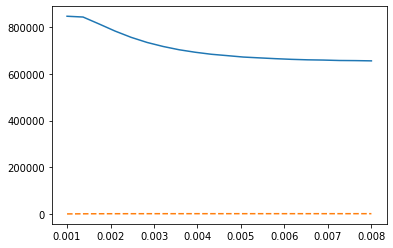

In [184]:
# Simulates for varying alpha_c
X = np.linspace(0.001, 0.008, 20)
Y = [sum(simulate(alpha_c = x, beta_params=(2, 6))[2]) for x in X]
Y2 = [compute_r(x*1000) for x in X]
plt.plot(X, Y)
plt.plot(X, Y2, '--')

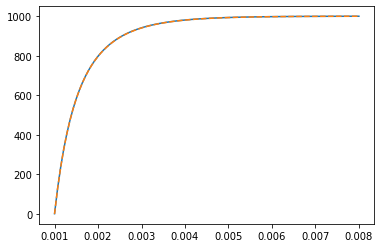

In [148]:
# Simulates for varying alpha_c
X = np.linspace(0.001, 0.008, 100)
Y = [simulate(alpha_c = x) for x in X]
Y2 = [compute_r(x*1000) for x in X]
plt.plot(X, Y)
plt.plot(X, Y2, '--')

array([0.        , 0.20512821, 0.41025641, 0.61538462, 0.82051282,
       1.02564103, 1.23076923, 1.43589744, 1.64102564, 1.84615385,
       2.05128205, 2.25641026, 2.46153846, 2.66666667, 2.87179487,
       3.07692308, 3.28205128, 3.48717949, 3.69230769, 3.8974359 ,
       4.1025641 , 4.30769231, 4.51282051, 4.71794872, 4.92307692,
       5.12820513, 5.33333333, 5.53846154, 5.74358974, 5.94871795,
       6.15384615, 6.35897436, 6.56410256, 6.76923077, 6.97435897,
       7.17948718, 7.38461538, 7.58974359, 7.79487179, 8.        ])

/var/folders/f0/jtfp47nd0h74_sbtnbwhqzgm0000gn/T/ipykernel_6006/2312418805.py:41: RuntimeWarning: invalid value encountered in double_scalars
  new_infections[b] = S[b] * zero_moment_I * alpha_c + p * S[b] * first_moment_I * alpha_r
/var/folders/f0/jtfp47nd0h74_sbtnbwhqzgm0000gn/T/ipykernel_6006/2312418805.py:43: RuntimeWarning: invalid value encountered in subtract
  S -= dt * new_infections
/var/folders/f0/jtfp47nd0h74_sbtnbwhqzgm0000gn/T/ipykernel_6006/2312418805.py:45: RuntimeWarning: invalid value encountered in subtract
  I -= recoveries


[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
[1004.7636659496596, 1004.7634332609231, 1004.7623024083299, 1004.7602225523195, 1004.7571332567377, 1004.7529633048049, 1004.7476293249345, 1004.7410341968315, 1004.7330652034752, 1004.7235918888102, 1004.7124635743174, 1004.6995064798176, 1004.6845153857004, 1004.6672697594702, 1004.6474992574757, 1004.6248985147802, 1004.5991160846756, 1004.5697474005615, 1004.5363265955884, 1004.4983169907387, 1004.4551000301349, 1004.4059624053943, 1004.3500810677339, 1004.2865057766517, 1004.2141387762526, 1004.1317111239038, 1004.0377551197774, 1003.9305721993331, 1003.8082005612591, 1003.6683516482763, 1003.5083895902724, 1003.3252524496946, 1003.1153940851789, 1002.8746852407012, 1002.5983524251876, 1002.2808580313306, 1001.9157649952614, 1001.4956345863185, 1001.0118308837033, 1000.4543859940446

/var/folders/f0/jtfp47nd0h74_sbtnbwhqzgm0000gn/T/ipykernel_6006/2312418805.py:41: RuntimeWarning: invalid value encountered in double_scalars
  new_infections[b] = S[b] * zero_moment_I * alpha_c + p * S[b] * first_moment_I * alpha_r
/var/folders/f0/jtfp47nd0h74_sbtnbwhqzgm0000gn/T/ipykernel_6006/2312418805.py:43: RuntimeWarning: invalid value encountered in subtract
  S -= dt * new_infections
/var/folders/f0/jtfp47nd0h74_sbtnbwhqzgm0000gn/T/ipykernel_6006/2312418805.py:45: RuntimeWarning: invalid value encountered in subtract
  I -= recoveries


[999.7023873483136, 999.7001721009951, 999.6934670079012, 999.6820930935626, 999.6657464043739, 999.643983403514, 999.6162271140697, 999.5817184915584, 999.5395124596929, 999.4884426985492, 999.4270791779114, 999.3537020907365, 999.2662156065265, 999.1620994523029, 999.0383208711679, 998.8912290293317, 998.7164532723542, 998.5087308960037, 998.261729175881, 997.9678553124328, 997.6179817539145, 997.2011178617902, 996.7040672150546, 996.1109382997215, 995.4026243171888, 994.5561265064437, 993.5438142513489, 992.332475928622, 990.8822719033843, 989.1455085407421, 987.0652410609035, 984.5738136058246, 981.5912869338796, 978.0240158723922, 973.7635617560321, 968.686291216899, 962.6542723614286, 955.5181335630178, 947.1227805970918, 937.3167415214485]
[989.5786284804046, 989.57725667381, 989.5731161333343, 989.5661312732718, 989.5561693912356, 989.5430576646227, 989.5265488628377, 989.5063356412076, 989.4820382697377, 989.4531956024991, 989.4192540444727, 989.3795542184528, 989.333309978938

/var/folders/f0/jtfp47nd0h74_sbtnbwhqzgm0000gn/T/ipykernel_6006/2312418805.py:41: RuntimeWarning: invalid value encountered in double_scalars
  new_infections[b] = S[b] * zero_moment_I * alpha_c + p * S[b] * first_moment_I * alpha_r
/var/folders/f0/jtfp47nd0h74_sbtnbwhqzgm0000gn/T/ipykernel_6006/2312418805.py:43: RuntimeWarning: invalid value encountered in subtract
  S -= dt * new_infections
/var/folders/f0/jtfp47nd0h74_sbtnbwhqzgm0000gn/T/ipykernel_6006/2312418805.py:45: RuntimeWarning: invalid value encountered in subtract
  I -= recoveries


KeyboardInterrupt: 

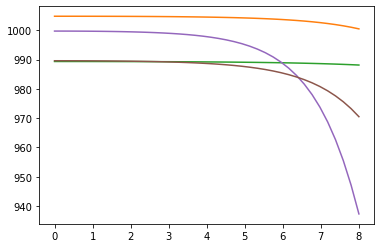

In [201]:
# Simulates for fixed R0
alpha_cs = np.linspace(8.0, 0.0, 40)
R0 = 8
N = 1000
for row in [
    [(0.3, 0.1), (3, 1), (6, 2)],
    [(0.1, 0.1), (1, 1), (2, 2)],
    [(0.1, 0.3), (1, 3), (2, 6)]]:
    for beta_params in row:
        mean_p = (beta_params[0]/(beta_params[0] + beta_params[1]))
        series = []
        for alpha_c in alpha_cs:
            # compute alpha_r using the following (weighting by N):
            # R0 = alpha_c + alpha_r * E[p]^2
            alpha_r = (R0 - alpha_c)/(mean_p**2)
            #print(f'\r{beta_params}, {alpha_c}, {alpha_r}', end='')
            series.append(simulate(beta_params=beta_params, alpha_c=alpha_c/N, alpha_r=alpha_r/N))
        plt.plot(8 - alpha_cs, series, label=beta_params)
plt.legend()

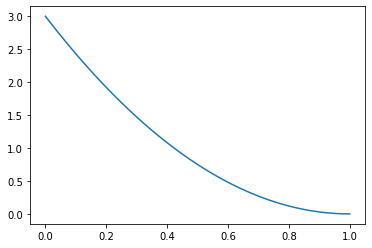

In [84]:
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, 1, 3))

